In [2]:
#ejemplo 03#Repliación de ejemplo

#Código de ejemplo de WVAM
  
from transformers import Wav2Vec2FeatureExtractor, WavLMForXVector
from datasets import load_dataset
import torch

#dataset ciempies

#dataset = load_dataset("ciempiess/ciempiess_test")


In [3]:
dataset = load_dataset("ciempiess/ciempiess_light")

In [4]:
#modelo predeterminado
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained('microsoft/wavlm-base-sv')
model = WavLMForXVector.from_pretrained('microsoft/wavlm-base-sv')

In [5]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['audio_id', 'audio', 'speaker_id', 'gender', 'duration', 'normalized_text'],
        num_rows: 16663
    })
})


In [6]:
# Accedemos al subconjunto 'test' del dataset
test_dataset = dataset['train']

In [7]:
import torch

# Sample rate deseado (16000 Hz)
sampling_rate = 16000

# Umbral de similitud
threshold = 0.86

# Crear la función de similitud de coseno
cosine_sim = torch.nn.CosineSimilarity(dim=-1)


In [8]:
import torch
import numpy as np

# Sample rate deseado (16000 Hz)
sampling_rate = 16000

# Cargar todos los audios de los hablantes en un diccionario
audios_dict = {sample["speaker_id"]: sample["audio"]["array"] for sample in test_dataset}


In [9]:
# Diccionario para almacenar las embeddings de cada hablante
embeddings_dict = {}

# Extraer las características de cada hablante y calcular las embeddings
for speaker_id, speaker_audio in audios_dict.items():
    speaker_input = feature_extractor(speaker_audio, sampling_rate=sampling_rate, return_tensors="pt")
    speaker_embedding = model(**speaker_input).embeddings
    speaker_embedding = torch.nn.functional.normalize(speaker_embedding, dim=-1).detach().cpu().numpy()
    embeddings_dict[speaker_id] = speaker_embedding


c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\functional.py:5193: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


In [10]:
# Obtener los IDs de los hablantes y preparar la matriz de similitud
speaker_ids = list(embeddings_dict.keys())
num_speakers = len(speaker_ids)
similarity_matrix = np.zeros((num_speakers, num_speakers))

# Calcular la similitud usando el coseno entre cada par de embeddings
cosine_sim = torch.nn.CosineSimilarity(dim=-1)
for i, speaker_id1 in enumerate(speaker_ids):
    for j, speaker_id2 in enumerate(speaker_ids):
        if i != j:  # No queremos comparar un hablante consigo mismo
            similarity = cosine_sim(
                torch.tensor(embeddings_dict[speaker_id1]),
                torch.tensor(embeddings_dict[speaker_id2])
            ).item()
            similarity_matrix[i, j] = similarity
        else:
            similarity_matrix[i, j] = 1.0  # Similaridad máxima consigo mismo


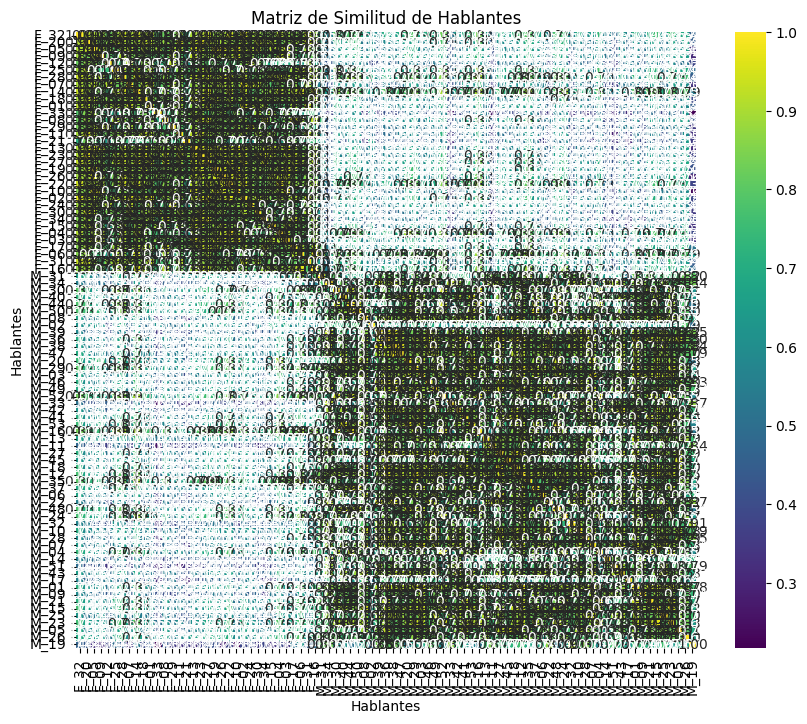

In [11]:
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=speaker_ids, yticklabels=speaker_ids, cmap="viridis", annot=True, fmt=".2f")
plt.title("Matriz de Similitud de Hablantes")
plt.xlabel("Hablantes")
plt.ylabel("Hablantes")
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

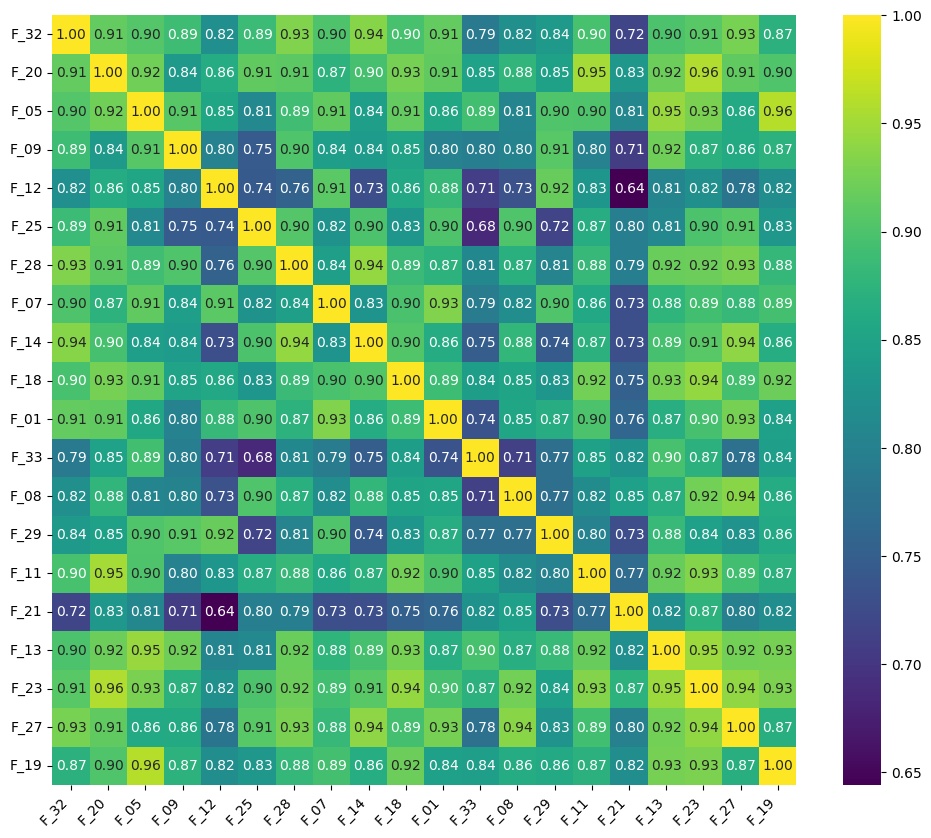

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 10))  # Ajusta el tamaño según lo necesario

# Definir el subconjunto de hablantes si deseas reducir el número de hablantes en el heatmap
# Usa la siguiente línea para usar todos los hablantes
#selected_speaker_ids = speaker_ids
# Usa la siguiente línea para usar un subconjunto de hablantes (por ejemplo, los primeros 10)
selected_speaker_ids = speaker_ids[:20]  # Ajusta el número según lo que prefieras
selected_similarity_matrix = similarity_matrix[:20, :20]  # Ajusta también la matriz para que coincida
#selected_similarity_matrix = similarity_matrix  # Usar la matriz completa


# Crear el heatmap
sns.heatmap(
    selected_similarity_matrix, 
    xticklabels=selected_speaker_ids, 
    yticklabels=selected_speaker_ids, 
    cmap="viridis", 
    annot=True,  # Muestra los valores en cada celda
    fmt=".2f"    # Formato de los números
)

# Ajustar la rotación de las etiquetas para que sean más legibles
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y verticales

# Agregar una barra de color para representar la similitud de coseno
plt.colorbar(label='Similitud de Coseno')

# Mostrar el gráfico
plt.show()


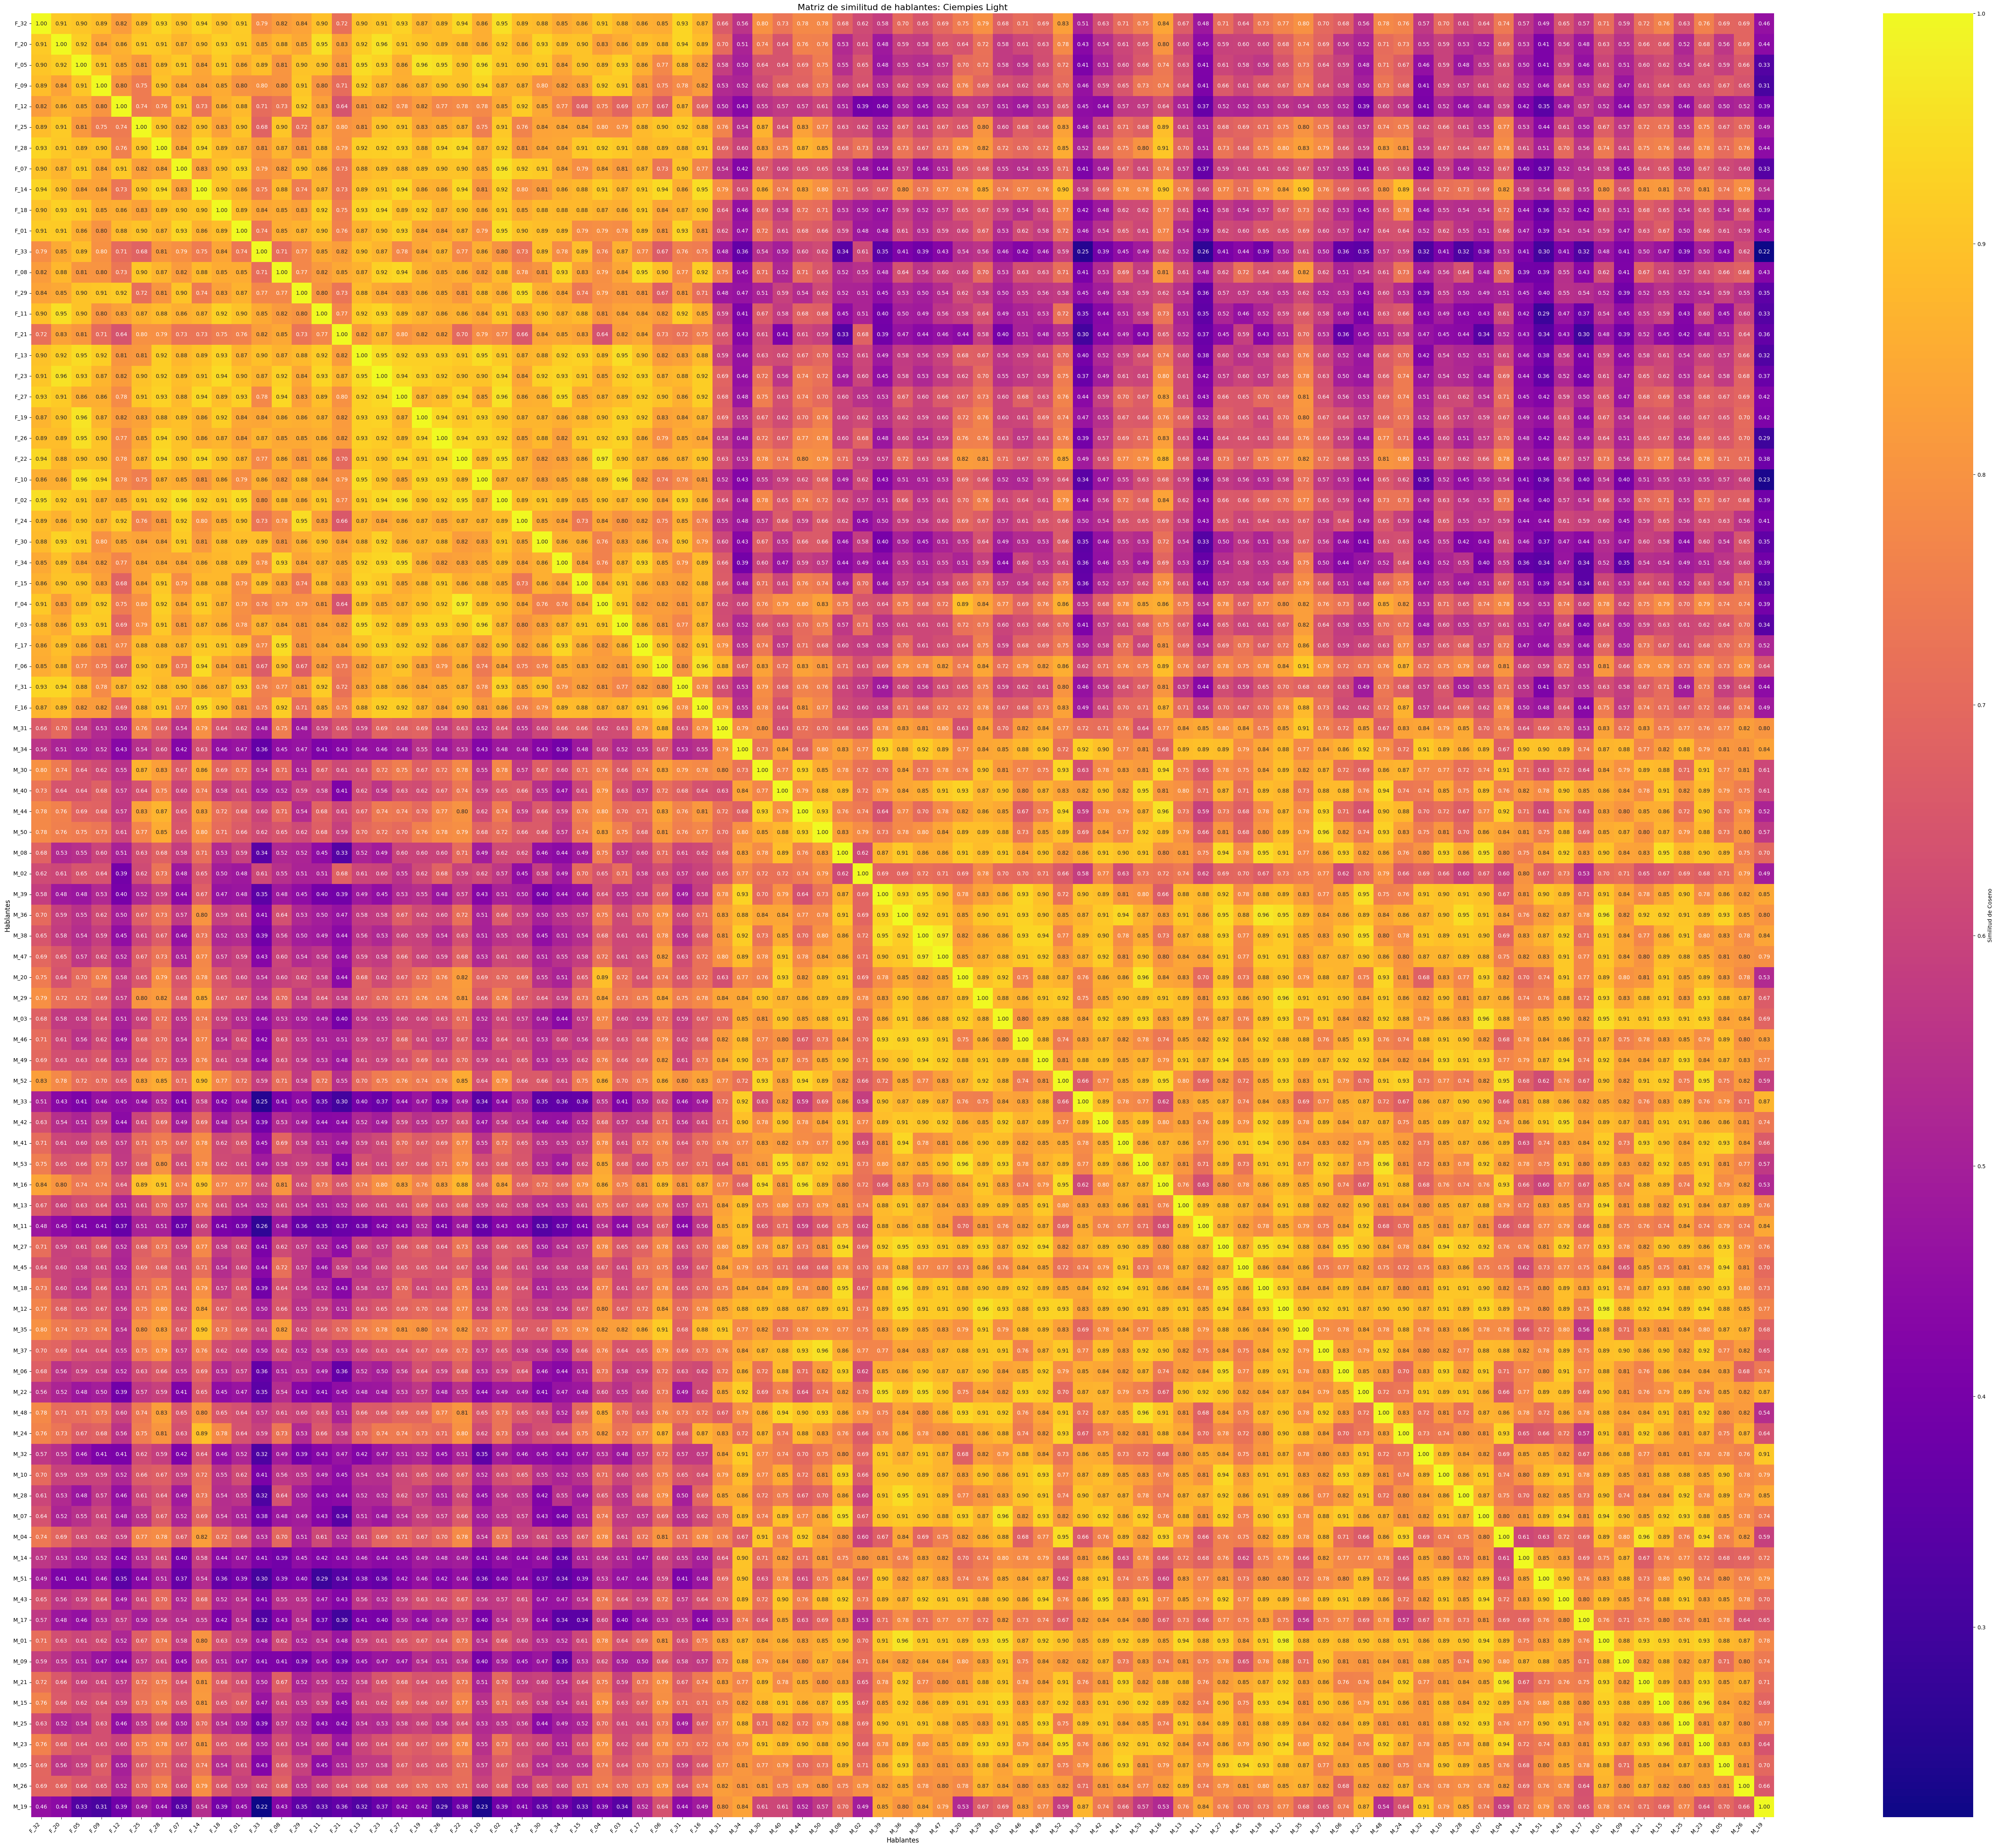

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar el tamaño de la figura
plt.figure(figsize=(72, 60))  # Ajusta el tamaño según lo necesario

# Usar la matriz completa
selected_similarity_matrix = similarity_matrix  
selected_speaker_ids = speaker_ids  # Usar todos los IDs de hablantes

# Crear el heatmap con la barra de color automática y la paleta "plasma"
sns.heatmap(
    selected_similarity_matrix, 
    xticklabels=selected_speaker_ids, 
    yticklabels=selected_speaker_ids, 
    cmap="plasma",  # Cambiar la paleta de colores
    annot=True,  
    fmt=".2f",
    cbar_kws={'label': 'Similitud de Coseno'}  # Personaliza la barra de color
)

# Ajustar la rotación de las etiquetas para que sean más legibles
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y verticales

# Agregar el título y las etiquetas de los ejes
plt.title("Matriz de similitud de hablantes: Ciempies Light", fontsize=16)
plt.xlabel("Hablantes", fontsize=12)
plt.ylabel("Hablantes", fontsize=12)

# Mostrar el gráfico
plt.show()
